In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import kde
from scipy.stats import ttest_rel
from scipy import stats
%matplotlib inline 

In [2]:
data = pd.read_csv('Crab_molt.csv')

In [3]:
data.shape

(476, 2)

In [4]:
data = data.dropna()

In [5]:
data

,post molt size,pre molt size
0,127.7,113.6
1,133.2,118.1
2,135.3,119.9
3,143.3,126.2
4,139.3,126.7
...,...,...
467,150.3,135.9
468,151.2,135.6
469,143.5,129.6
470,148.3,134.1


In [6]:
pre_molt = data['pre molt size']
post_molt = data['post molt size']

In [7]:
print("Average size difference before and after Molting: {:.2f}".format(post_molt.mean() - pre_molt.mean()))

Average size difference before and after Molting: 14.69


In [8]:
print("Minimum size of Crab before Molting:", min(pre_molt))
print("Maximum size of Crab before Molting:", max(pre_molt))
print("Average size of Crab before Molting: {:.2f}".format(pre_molt.mean()))
print("Median size of Crab before Molting: {:.2f}".format(pre_molt.median()))
print("Standard Deviation of Crab size before Molting: {:.2f}".format(pre_molt.std()))
print("Skewness of distribution of Crab size before Molting: {:.4f}".format(skew(pre_molt, axis=0, bias=True)))
print("Kurtosis of distribution of Crab size before Molting: {:.4f}".format(kurtosis(pre_molt, axis=0, bias=True)))

Minimum size of Crab before Molting: 31.1
Maximum size of Crab before Molting: 155.1
Average size of Crab before Molting: 129.21
Median size of Crab before Molting: 132.80
Standard Deviation of Crab size before Molting: 15.86
Skewness of distribution of Crab size before Molting: -2.0035
Kurtosis of distribution of Crab size before Molting: 6.7663


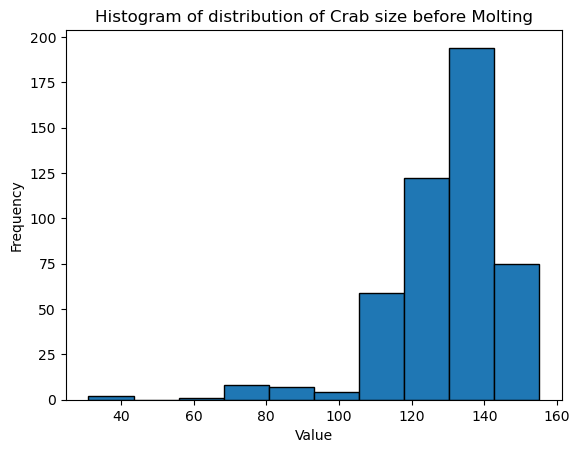

In [9]:
# Create histogram
plt.hist(pre_molt, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Crab size before Molting')
plt.show()

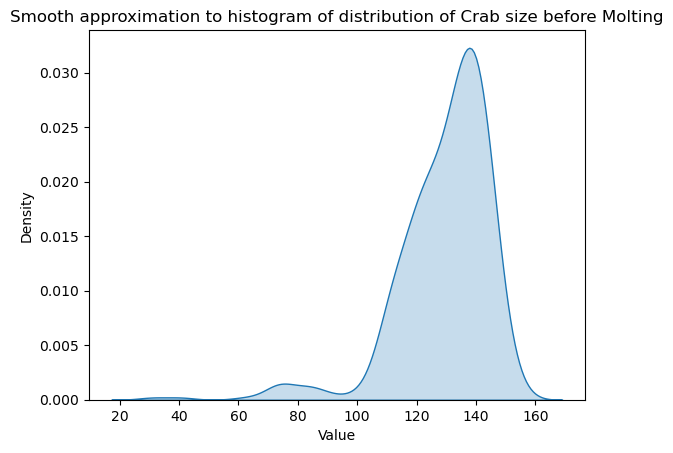

In [10]:
# Create KDE plot
sns.kdeplot(pre_molt, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of distribution of Crab size before Molting')
plt.show()

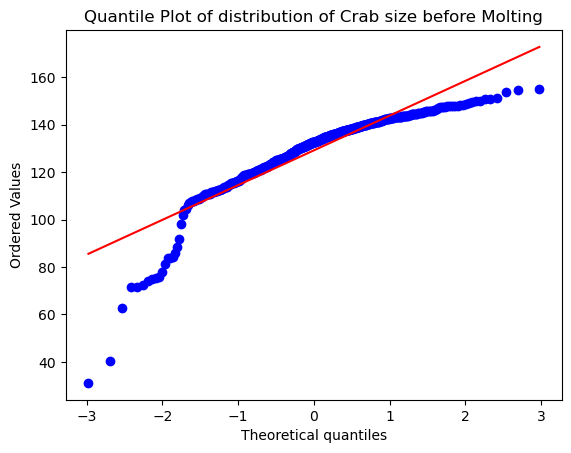

In [11]:
# Create QQ plot
plt.figure()
stats.probplot(pre_molt, dist="norm", plot=plt)
plt.title('Quantile Plot of distribution of Crab size before Molting')
plt.show()

In [12]:
print("Minimum size of Crab after Molting:", min(post_molt))
print("Maximum size of Crab after Molting:", max(post_molt))
print("Average size of Crab after Molting: {:.2f}".format(post_molt.mean()))
print("Median size of Crab after Molting: {:.2f}".format(post_molt.median()))
print("Standard Deviation of Crab size after Molting: {:.2f}".format(post_molt.std()))
print("Skewness of distribution of Crab size after Molting: {:.4f}".format(skew(post_molt, axis=0, bias=True)))
print("Kurtosis of distribution of Crab size after Molting: {:.4f}".format(kurtosis(post_molt, axis=0, bias=True)))

Minimum size of Crab after Molting: 38.8
Maximum size of Crab after Molting: 166.8
Average size of Crab after Molting: 143.90
Median size of Crab after Molting: 147.40
Standard Deviation of Crab size after Molting: 14.64
Skewness of distribution of Crab size after Molting: -2.3469
Kurtosis of distribution of Crab size after Molting: 10.1160


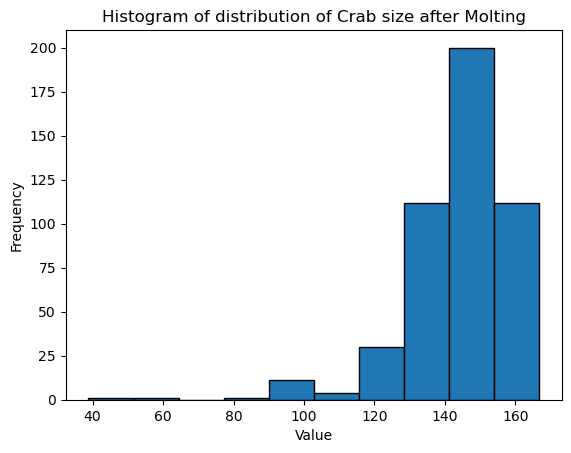

In [13]:
# Create histogram
plt.hist(post_molt, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Crab size after Molting')
plt.show()

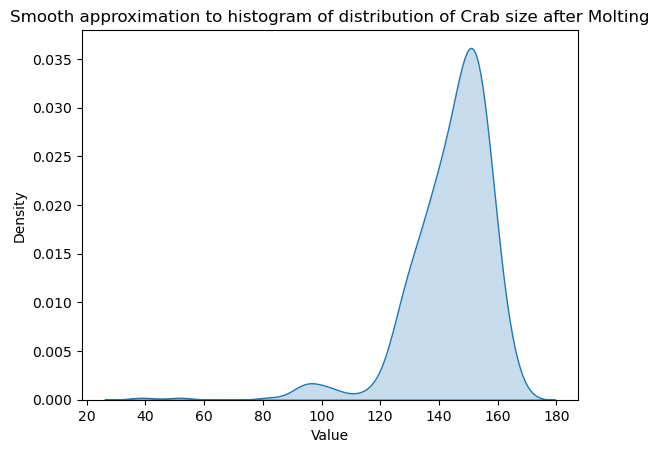

In [14]:
# Create KDE plot
sns.kdeplot(post_molt, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Smooth approximation to histogram of distribution of Crab size after Molting')
plt.show()

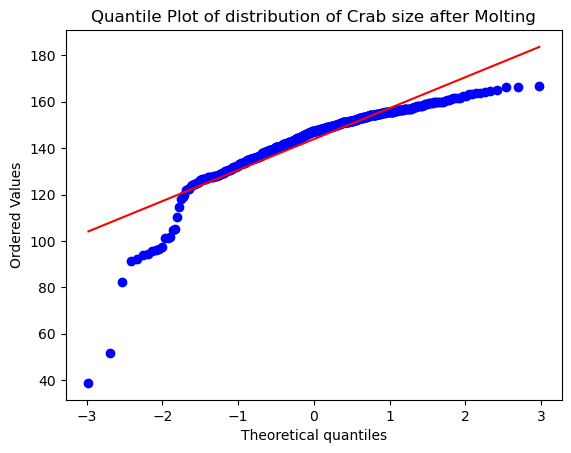

In [15]:
# Create QQ plot
plt.figure()
stats.probplot(post_molt, dist="norm", plot=plt)
plt.title('Quantile Plot of distribution of Crab size after Molting')
plt.show()

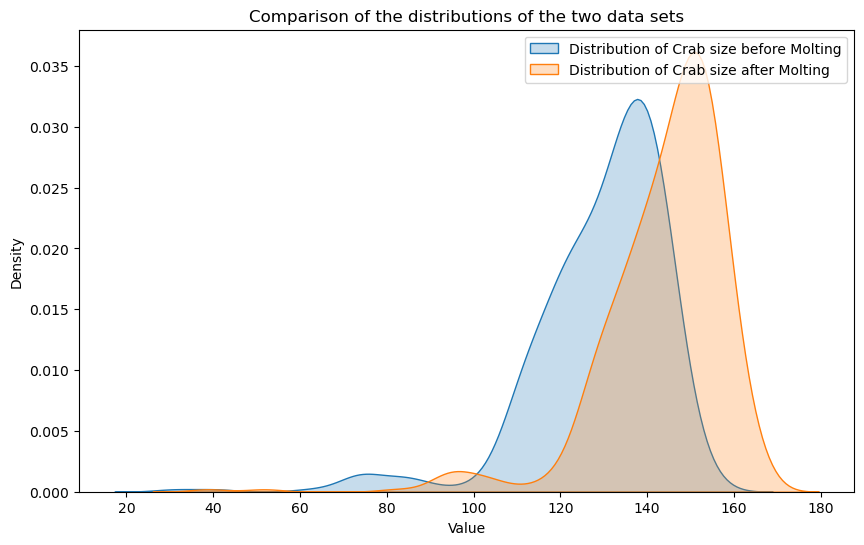

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(pre_molt, fill=True, label='Distribution of Crab size before Molting')
sns.kdeplot(post_molt, fill=True, label='Distribution of Crab size after Molting')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of the distributions of the two data sets')
plt.legend()
plt.show()

### Comparison of Cumulative Distributions

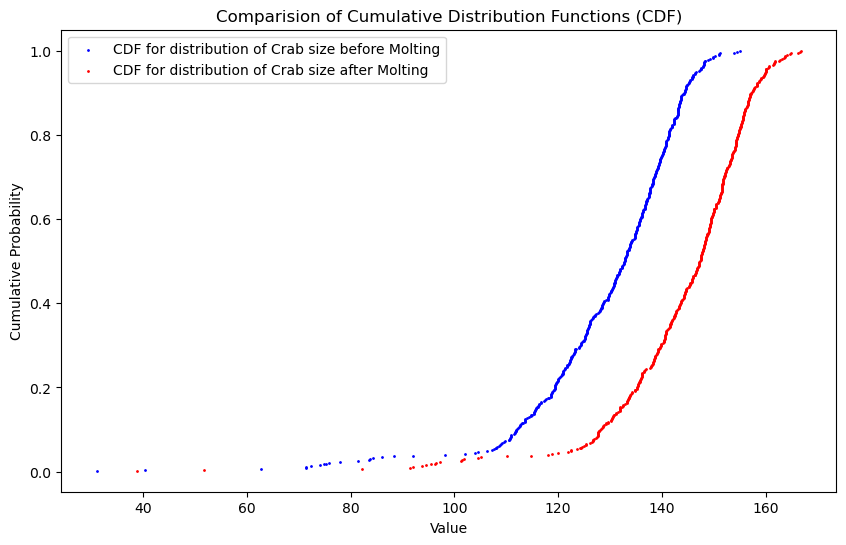

In [17]:
# Sort the data for both datasets
sorted_pre_molt = np.sort(pre_molt)
sorted_post_molt = np.sort(post_molt)

# Calculate the cumulative probabilities for both datasets
cumulative_prob1 = np.arange(1, len(sorted_pre_molt) + 1) / len(sorted_pre_molt)
cumulative_prob2 = np.arange(1, len(sorted_post_molt) + 1) / len(sorted_post_molt)

plt.figure(figsize=(10, 6))
plt.scatter(sorted_pre_molt, cumulative_prob1, label='CDF for distribution of Crab size before Molting', s=1, color='blue')
plt.scatter(sorted_post_molt, cumulative_prob2, label='CDF for distribution of Crab size after Molting', s=1, color='red')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Cumulative Distribution Functions (CDF)')
plt.legend()
plt.show()


### Cohen's d for Effect Size

In [18]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u2 - u1) / s

In [19]:
cohend_value = cohend(pre_molt, post_molt)
print(f"Cohen's d: {cohend_value}")

Cohen's d: 0.9620678692342478


## Statistical Significance

A standard way to test for statistical significance is to calculate a p-value. There are two common ways to calculate a ***p-value*** by using:
 - a **T-test** (assuming the data is approximately normally distributed) or
 - by using a **Monte Carlo Method** otherwise.

### T-test

In [20]:
# T-test for statistical significance
t_stat, p_value_t = ttest_rel(pre_molt, post_molt)
print(f"t-test: {t_stat}")
print(f"p-value (T-Test): {p_value_t}")

t-test: -130.56558198217652
p-value (T-Test): 0.0


The **T-test** assumes that the data is approximately normally distributed. However, our data is negatively skewed. So we will calculate the ***p-value*** using Monte Carlo method

### Monte Carlo Test

In [21]:
max_simulations = 10000000

# Pooled ages, total, and lengths
PooledSizes = np.concatenate((pre_molt, post_molt))
total = np.sum(PooledSizes)
w = len(post_molt)
b = len(pre_molt)

# Observed difference in means
diff = np.mean(post_molt) - np.mean(pre_molt)

# Monte Carlo simulation
r = 0
for n in range(1, max_simulations + 1):
    A = np.random.choice(PooledSizes, size=w, replace=False)  # Random sample without replacement
    x = np.mean(A)
    y = (total - np.sum(A)) / b
    if x - y > diff:
        r += 1

# Calculate p-value
p_value_mc = (r + 1) / (n + 1)

print("p-value (Monte Carlo)=", p_value_mc)


p-value (Monte Carlo)= 9.9999990000001e-08
